# Biomedical Data Science & AI

# Exercise sheet 5 - Introduction - Due date: May 25th

Submitted to:

Mohamed Aborageh : s0moabor@uni-bonn.de

Vinay Srinivas Bharadhwaj: s0vibhar@uni-bonn.de

Yasamin Salimi: yasisali@uni-bonn.de

# Exercise 1 - k-means clustering (11 points)

#### 1. Use the K-means algorithm and Euclidean distance to cluster the 10 data points into K = 3 clusters. The coordinates of the data points are given in Table 1. Use the data points a4, a5, and a8 as initialization and perform 2 iteration steps. You can do the cluster assignment also visually without computing the exact distances. (2 point)

k=3 # no of classes

initialization=a4,a5 and a8

x0 and y0 is observed values

xc and yc is centered values

Euclidean distance=sqrt(x0-xc)^2+(y0-yc)

1st iteration: #i will do clustering for a1

calulate distance 

K1-> sqrt(2-4)^2+(1-8)^2 = -6.7

k2-> sqrt(2-3)^2+(1-1)^2  =1

k3->sqrt(2-60)^2+(1-4)^2 = 58.0

a1 data point will assign to cluster k1 as its euclidean distance is lower than others.

calculate new centeroid calculation for k1 :

k1=(2+4/2, 1+8/2) = (3,4)

#2nd iteration for a2:

K1-> sqrt(5-3)^2+(7-4)^2 = 3.6

k2-> sqrt(5-3)^2+(7-1)^2  =6.3

k3->sqrt(5-60)^2+(7-4)^2 = 55.0

a2 will also assign to cluster k1

now we apply same stratgey for remaining iterations

#### 2. Shown are the results of a k-means clustering with three different initializations:

#### I. How does the choice of the initial starting points affect the clustering? (1 point)

Initial starting point should be carefully selected for K-Mean clustering algorithm. Because of the random selection of initial centroids, the outcome will be different from the previous one on each run. Due to this drawback, clusters vary from one another

Also, data items in clusters may vary from one cluster to another

#### II. How can you avoid getting a clustering result that is dependent on the initialization? (1 point)

By repeating (restarting) the algorithm.when the clusters overlap, k-means can be significantly improved using this trick and we can also avoid getting clustering result that depend on initialization

#### III. What are the pros and cons of the k-means clustering? (1 point)

Advantages:


1-Relatively simple to implement.

2-Scales to large data sets.

3-Guarantees convergence.

4-Can warm-start the positions of centroids.

5-Generalizes to clusters of different shapes and sizes, such as elliptical clusters.


disadvantages:

1-It requires to specify the number of clusters (k) in advance.

2-It can not handle noisy data and outliers.

3-Different initial partitions can result in different final clusters.

#### 3. Use the provided breast cancer data (cancer.csv) to perform a k-means clustering. Perform the clustering for a range of clusters between 2 and 10. Set the random_state to 20 to keep reproducibility. (2 point)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt


#loading the dataset
file = pd.read_csv("cancer.csv")
df = file.iloc[: , 1:]

#k-means clustering for clusters between 2 to 10
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 20) #setting random state to 20 for reproducibility
    kmeans.fit(df)
    y_predict = kmeans.fit_predict(df)
    print("No of clusters: {}\n{}\n".format(i,kmeans.cluster_centers_)) #printing the centroids of each clusters

No of clusters: 2
[[19.18387324  0.16916028]
 [12.44571194  0.06207506]]

No of clusters: 3
[[19.76584746  0.18025441]
 [11.00591284  0.04698859]
 [14.19214592  0.08160205]]

No of clusters: 4
[[10.5799321   0.04746778]
 [16.33669725  0.12604183]
 [13.23100917  0.06051537]
 [20.74275     0.1988265 ]]

No of clusters: 5
[[19.3823913   0.16969815]
 [10.30640458  0.04675049]
 [12.79533019  0.05215498]
 [24.51642857  0.28917857]
 [15.41058333  0.11404092]]

No of clusters: 6
[[ 9.66203846  0.04638896]
 [14.19523179  0.08147145]
 [24.9125      0.28144167]
 [12.04089947  0.04894451]
 [19.94183099  0.18206648]
 [16.92294118  0.13311397]]

No of clusters: 7
[[20.17633333  0.189187  ]
 [11.60906475  0.044836  ]
 [15.1005      0.1128568 ]
 [17.70555556  0.13576741]
 [13.23532847  0.05730028]
 [24.9125      0.28144167]
 [ 9.49028358  0.04625118]]

No of clusters: 8
[[20.21655172  0.19158121]
 [12.64868421  0.05157432]
 [15.49971429  0.11830686]
 [ 9.37415     0.04729827]
 [17.84442308  0.13630808

#### a. For each clustering plot the cluster assignment within a scatter plot for the features “mean radius” and “mean concavity”. (1 point)

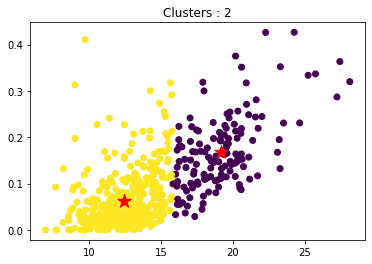

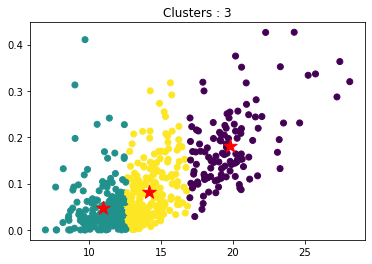

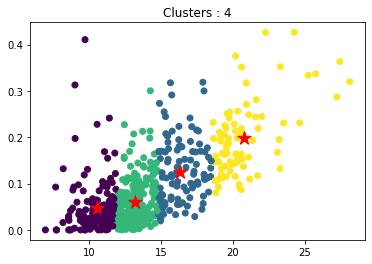

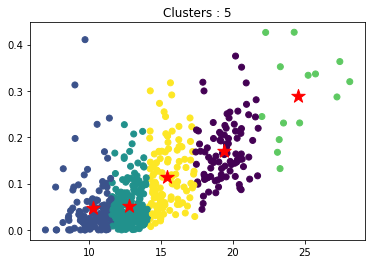

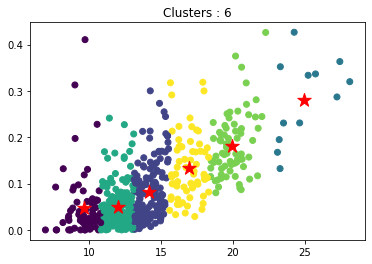

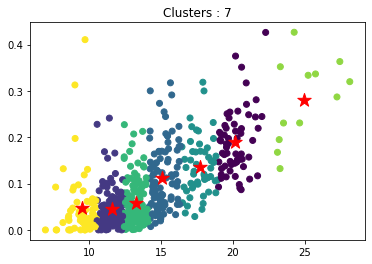

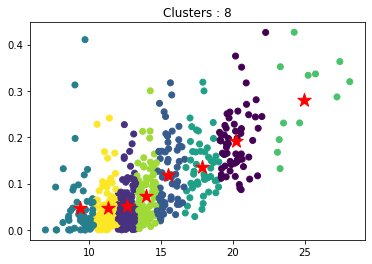

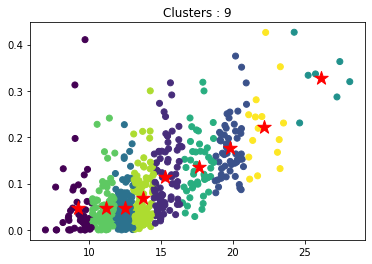

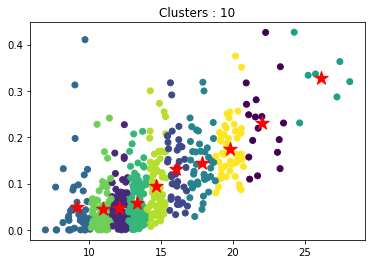

In [2]:
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 20)
    kmeans.fit(df)
    y_predict = kmeans.fit_predict(df)
    centroids = kmeans.cluster_centers_
    
    #plotting a scatter plot with both the features
    #0 (1st column) represents mean radius ; 1 (2nd column) represents mean concavity
    
    plt.scatter(df.iloc[:,0] , df.iloc[:,1], c=y_predict)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s = 200, c='red')
    plt.title("Clusters : {}".format(i))
    plt.show()

#### b. For each clustering create silhouette plots and print out the score. (1 point)

Silhouette scores
For 2 clusters : 0.6476
For 3 clusters : 0.5469
For 4 clusters : 0.5085
For 5 clusters : 0.5262
For 6 clusters : 0.5377
For 7 clusters : 0.5469
For 8 clusters : 0.5267
For 9 clusters : 0.5161
For 10 clusters : 0.516


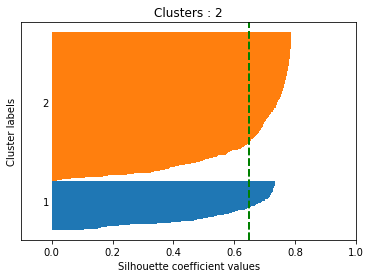

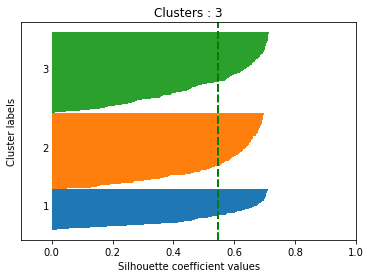

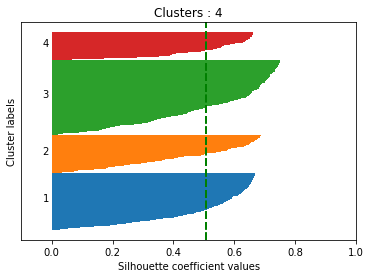

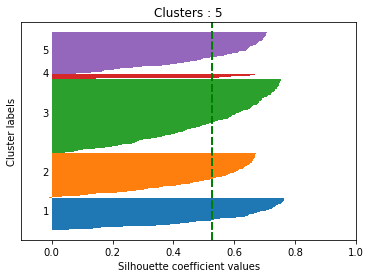

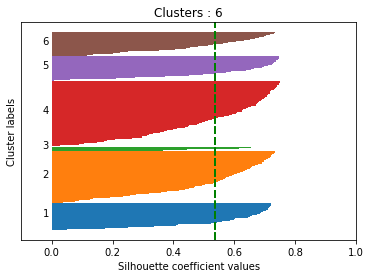

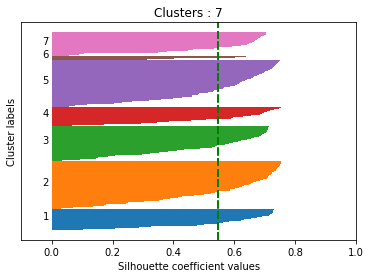

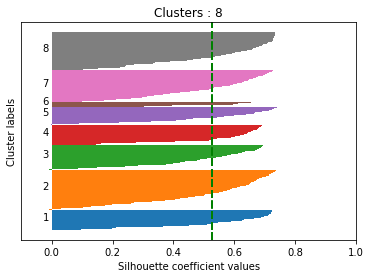

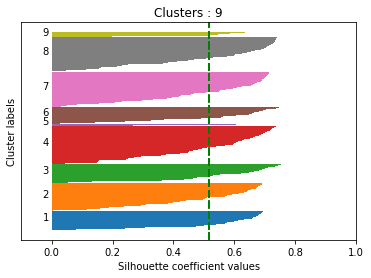

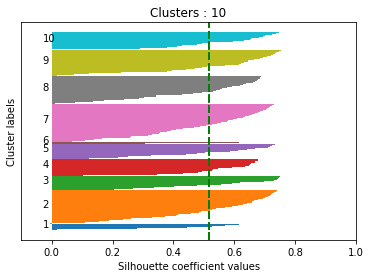

In [3]:
print("Silhouette scores")
for k in range(2,11):
    fig, ax = plt.subplots()
    kmeans = KMeans(n_clusters = k, max_iter = 300, random_state = 20)
    kmeans.fit(df)
    y_predict = kmeans.fit_predict(df)
    
    #calculating the silhouette scores for each cluster
    s_score = silhouette_score(df,y_predict)
    #calculating the silhouette scores for each sample
    silhouette_vals = silhouette_samples(df,y_predict)
    print("For {} clusters : {}".format(k,round(s_score,4)))
    #plotting the silhouette plot
    y_lower = y_upper = 0
    #accounting for the bar limits
    for i,cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower,y_upper),cluster_silhouette_vals,height =1)
        plt.text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)
        #plotting the avergae silhouette score as a vertical line
        ax.axvline(s_score,linestyle ='--',linewidth =2,color = 'green')
        ax.set_yticks([])
        ax.set_xlim([-0.1, 1])
        ax.set_title('Clusters : {}'.format(k))
        ax.set_xlabel('Silhouette coefficient values')
        ax.set_ylabel('Cluster labels')

#### c. Which is the best choice for the number of clusters? Why? (1 point)

The best choice for the number of clusters is 2. 
This can be validated by the silhouette scores. 
Higher the silhoeutte score, the less is the overlapping between the clusters and larger is the correctness of the data belonging to a particular cluster. 
By looking at the silhouette plots we could say that 2 is the optimal choice with the highest score of 0.6476

#### 4. Explain the difference between k-means and k-medoids. (1 point)

k-means minimizes the total squared error by calculating the sum of squared Euclidean distances for the data points whereas k-medoids minimizes the sum of dissimilarities between the points labeled in a cluster and a point which acts as the center of that cluster choosing the mediod which is the the most centrally located point in the dataset.

# Exercise 2 - Gaussian mixture models (11 points)

#### 1. Explain the EM-Algorithm in your own words, without using any formula. (2 points)

+ Expectation-Maximization (EM) algorithm is being used for Gaussian Mixture Models.
+ It works in two main steps:
    - E-step 
    - M-step
+ The algorithm alternates between these two steps.
+ In the first stage, there is initialization. Mean, variance and mixing coefficients(weights) are initialized.
+ In E-step, for given mean, spread parameter and mixing weights, the probabilistic assignment (Latent variable) is estimated. This is computed by Bayes's rule. It indicates the probabilty of a data point belonging to each cluster.
+ In M-step, the probabilistic assignment is fixed and other GMM parameters like cluster center, spread parameter and mixing weights are optimized in order to fit the data.
+ Then the E-step and M-steps are alternated until log likelihood or model parameters have stabilized.

#### 2. The complexity of the Gaussian mixture model can be controlled by restricting how the covariance matrices are allowed to vary. Assume your data has three features and you want to cluster it into 2 clusters. (3 points)

#### a. How many parameters (depending on the number of clusters) need to beestimated in the most general model (no restrictions on the covariances)?

In general model with no restrictions on covariances, for K-mixtures and D-dimenional data, covariance matrix of D $\times$ D $\times$ K, mean vector of D $\times$ K and weight of K parameters are estimated, summing up to: D $\times$ D $\times$ K +  D $\times$ K + K parameters. 

Hence for above model: 
3 $\times$ 3 $\times$ 2 +  3 $\times$ 2 + 2 = 26 parameters

#### b. Assuming that there is no correlation between the variables for each Gaussian, how many parameters does this model need to estimate?

Assuming no correlation between variables for each Gaussian, the covariance matrix is a diagonal matrix reduced to D $\times$ K. Hence it estimates: D $\times$ K +  D $\times$ K + K parameters.

Hence for above model: 
3 $\times$ 2 +  3 $\times$ 2 + 2 = 14 total parameters. 

For each Gaussian: 3+3+1 = 7 paramters.

#### c. Assuming that there is neither correlation nor does the variation for each feature change. How many parameters does the model have to estimate now?

Assuming that there is no correlation and no variation for each feature change, the covariance matrix would be identity diagonal matrix, (it would be similar to K-means clustering) and it would estimate: 1 + D $\times$ K + D parameters

Hence for above model: 
1 + 3 $\times$ 2 + 3 = 10 total parameters.

#### 3. Cluster the breast cancer dataset (on the entire dataset: cancer_all.csv) with the help of a Gaussian mixture model. Perform the clustering for a range of clusters between 2 and 10 and for all possible assumptions for the covariance matrices.Plot the BIC of each clustering. (2 points)

In [4]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
all_cancer = pd.read_csv("cancer_all.csv")
data = all_cancer.drop('Unnamed: 0', axis=1)
cols = data.columns

In [7]:
#check for null
data.isnull().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

In [8]:
#Standardize the data
x_sc = StandardScaler()
data_scaled = x_sc.fit_transform(data)

In [9]:
#Calculation of BIC
def SelBest(arr:list, X:int)->list:
    '''Returns the set of X configurations with shorter distance'''
    dx=np.argsort(arr)[:X]
    return arr[dx]


#Running the model for 20 iterations and taking mean and errors for each cluster
n_clusters=np.arange(2, 11)
covariance = ['full', 'tied', 'diag', 'spherical']
data = []
iterations=20
for cov in covariance:
    bics=[]
    bics_err=[]
    for n in n_clusters:
        tmp_bic=[]
        for i in range(iterations):
            gmm=GMM(n, n_init = 2, covariance_type = cov).fit(data_scaled)
            tmp_bic.append(gmm.bic(data_scaled))
        val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5))) 
        err=np.std(tmp_bic)
        bics.append(val)
        bics_err.append(err)
    data.append([cov, bics, bics_err])

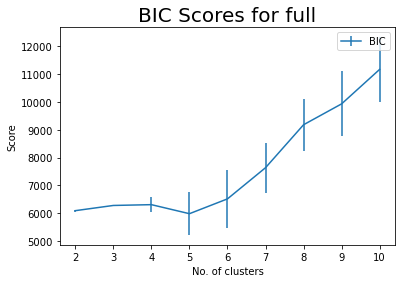

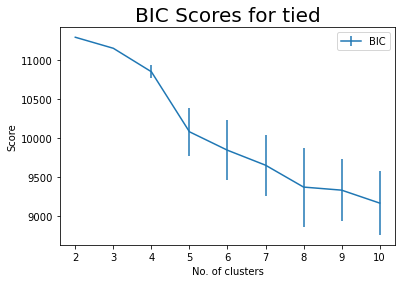

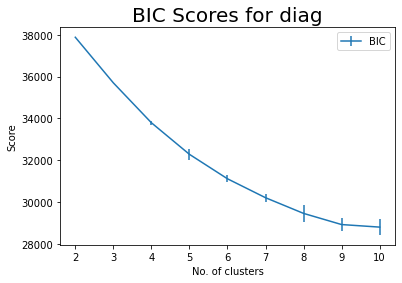

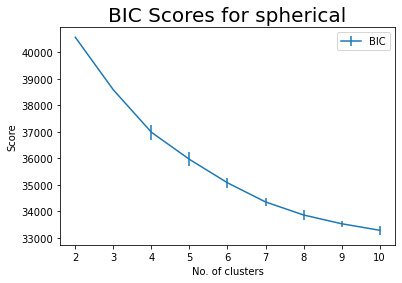

In [10]:
for d in data:
    plt.errorbar(n_clusters,d[1], yerr=d[2], label='BIC')
    plt.title("BIC Scores for {}".format(d[0]), fontsize=20)
    plt.xticks(n_clusters)
    plt.xlabel("No. of clusters")
    plt.ylabel("Score")
    plt.legend()
    plt.show()

#### a. Which is the best choice for the clustering? Why?

The lower is the BIC, the better is the model to actually predict the data. In order to choose a better number of clusters we look into the elbow of the graph. The place where there is less gradient between consecutive points (slope). 

From above graphs, we choose covariance type 'full' and number of clusters = 4 as a better model according to discussion above.

#### b. Plot the data (features “mean radius” and “mean compactness”), the cluster assignment and ellipses (to show the Gaussian component) for our selected model.

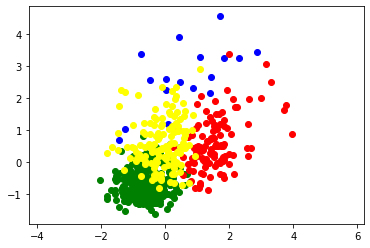

In [11]:
from matplotlib.patches import Ellipse

model_GMM = GMM(n_components = 4, n_init = 2, covariance_type = 'full').fit(data_scaled)
labels = model_GMM.predict(data_scaled)
frame = pd.DataFrame(data_scaled)

for i in frame.columns:
        frame.rename(columns = {i: [c for c in cols][i]}, inplace = True)
        
frame['cluster'] = labels

ax = plt.gca()
color=['blue','green', 'red', 'yellow']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    ax.scatter(data["mean radius"],data["mean compactness"],c=color[k])
    ax.axis('equal')

#### 4. How does the k-means model differ from the GMM model? Which model would you prefer for the given data and why? (1 point)

K-Mean model detects only spherical clusters whereas GMM can adjust its self to elliptic shaped. 

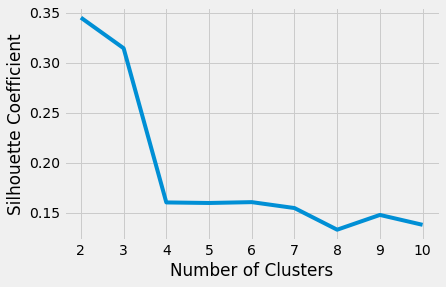

In [12]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

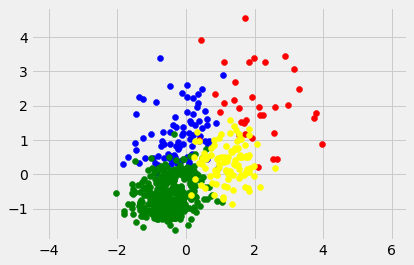

In [13]:
model_KM = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300).fit(data_scaled)
labels = model_KM.predict(data_scaled)
frame = pd.DataFrame(data_scaled)

for i in frame.columns:
        frame.rename(columns = {i: [c for c in cols][i]}, inplace = True)
        
frame['cluster'] = labels

ax = plt.gca()
color=['blue','green', 'red', 'yellow']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    ax.scatter(data["mean radius"],data["mean compactness"],c=color[k])
    ax.axis('equal')

It can be seen that GMM model is well suited for the above dataset.m

#### 5. Generate the K-Means model for the entire dataset and visualise both K-Mean and GMM models using PCA. (2 points)

In [14]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data_scaled)
PCA_components = pd.DataFrame(principalComponents)

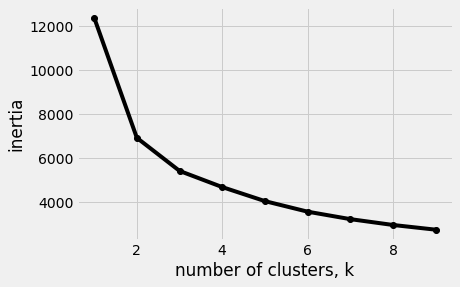

In [15]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

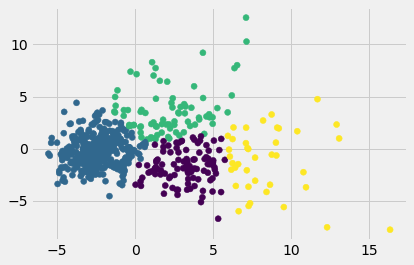

In [16]:
#K-means model using PCA
Model_KM = KMeans(n_clusters=4)
Model_KM.fit(PCA_components.iloc[:,:2])
labels_KM = Model_KM.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels_KM)
plt.show()

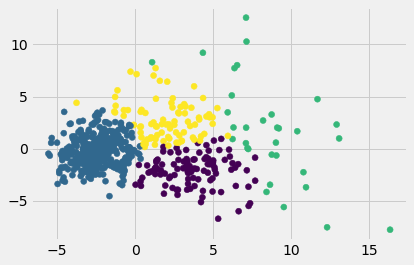

In [17]:
#GMM model using PCA
Model_GMM = GMM(n_components=4, n_init = 2, covariance_type = 'full')
Model_GMM.fit(PCA_components.iloc[:,:2])
labels_GMM = Model_GMM.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels_GMM)
plt.show()

#### 6. What are the advantages of GMMs over k-means? (1 point)

Advantages of GMM over k-means: 

- k-means only considers the mean to update the centroid while GMM takes into account the mean as well as the variance of the data

- Because of its covariance structure, GMM allows for mixed membership of points to clusters. The degree is based on the probability of the point being generated from each cluster’s (multivariate) normal distribution

# Exercise 3 - Consensus clustering (3 points)

#### 1. Perform (k-means) consensus clustering of samples for the given gene expression data allData.csv. Take minimum clusters as 2, maximum clusters as 6, resampling proportion as 80% and number of iterations as 10. Find the following: 

#### a. Best number of clusters (1 point)

[[0.422768   0.35618337 0.46720179 ... 0.49695316 0.4675314  0.32025136]
 [0.39968171 0.49288275 0.69739698 ... 0.50600354 0.58384574 0.55643411]]
................................................................
[[0.41893464 0.51433554 0.6941339  ... 0.49251717 0.59577733 0.55573377]
 [0.34065283 0.3235644  0.52088191 ... 0.54827837 0.41652654 0.32206725]
 [0.52669065 0.38604659 0.38884307 ... 0.43296703 0.529059   0.31263212]]
................................................................
[[0.62082956 0.55447134 0.6033511  ... 0.62994552 0.55719411 0.32143295]
 [0.08279095 0.07327107 0.39478363 ... 0.46483371 0.28085215 0.3141871 ]
 [0.52116138 0.41503769 0.41361417 ... 0.42008609 0.54010793 0.32504037]
 [0.41639533 0.50558781 0.70601239 ... 0.49395172 0.59376399 0.56511614]]
................................................................
[[0.58636091 0.54687931 0.49569826 ... 0.45503261 0.5632174  0.32518309]
 [0.47674167 0.36134755 0.43791348 ... 0.45020537 0.47262021 0.32979709]

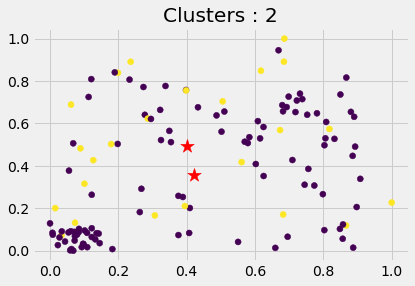

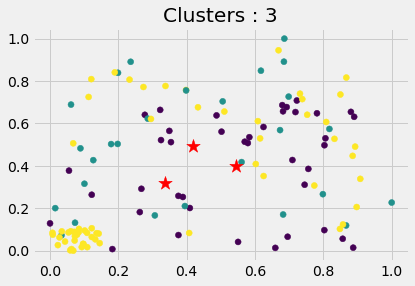

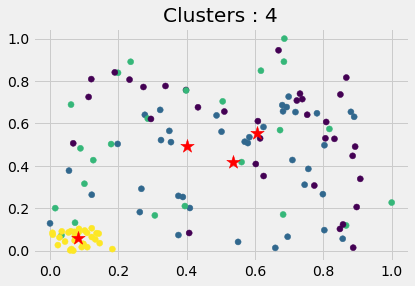

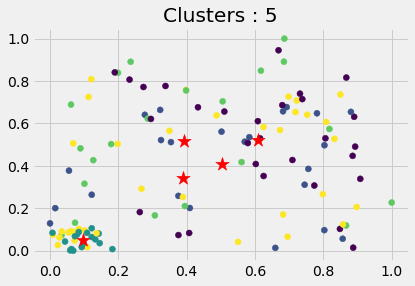

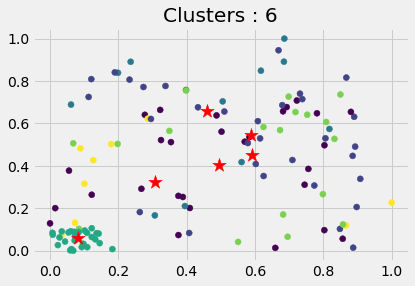

Silhouette scores
For 2 clusters : 0.1366
For 3 clusters : 0.1009
For 4 clusters : 0.1003
For 5 clusters : 0.0816
For 6 clusters : 0.0716


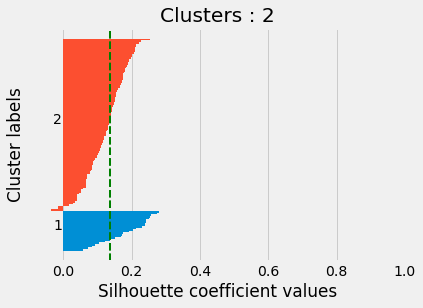

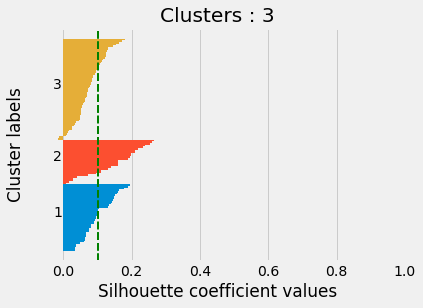

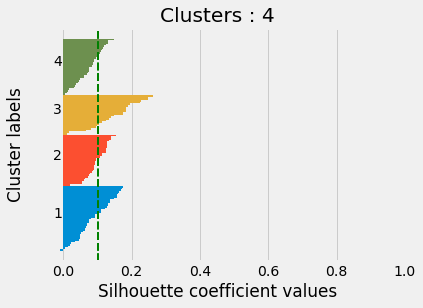

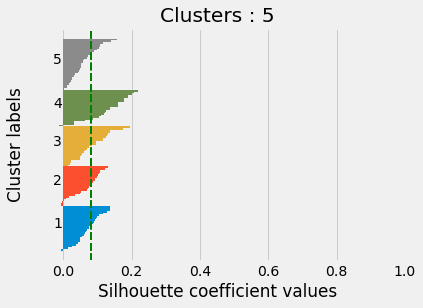

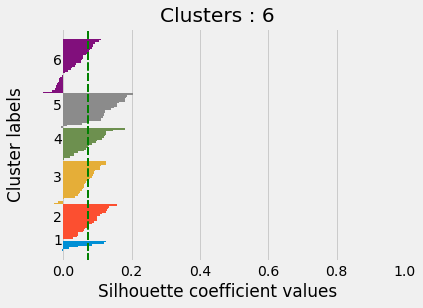

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt


#loading the dataset
file = pd.read_csv("allData.csv")
df = file.iloc[: , 1:]


kmeans = KMeans(n_clusters = 2, max_iter = 10, random_state = None) 
kmeans.fit(df)
y_predict = kmeans.fit_predict(df)
K1 = kmeans.cluster_centers_
print(K1)
print("................................................................")
kmeans = KMeans(n_clusters = 3, max_iter = 10, random_state = None) 
kmeans.fit(df)
y_predict = kmeans.fit_predict(df)
K2 = kmeans.cluster_centers_
print(K2)
print("................................................................")
kmeans = KMeans(n_clusters = 4, max_iter = 10, random_state = None) 
kmeans.fit(df)
y_predict = kmeans.fit_predict(df)
K3 = kmeans.cluster_centers_
print(K3)
print("................................................................")
kmeans = KMeans(n_clusters = 5, max_iter = 10, random_state = None) 
kmeans.fit(df)
y_predict = kmeans.fit_predict(df)
K4 = kmeans.cluster_centers_
print(K4)
print("................................................................")
kmeans = KMeans(n_clusters = 6, max_iter = 10, random_state = None) 
kmeans.fit(df)
y_predict = kmeans.fit_predict(df)
K5 = kmeans.cluster_centers_
print(K5)

for i in range(2,7):
    kmeans = KMeans(n_clusters = i, max_iter = 10, random_state = None)
    kmeans.fit(df)
    y_predict = kmeans.fit_predict(df)
    centroids = kmeans.cluster_centers_
    
    #plotting a scatter plot with both the features
    #0 (1st column) represents mean radius ; 1 (2nd column) represents mean concavity
    
    plt.scatter(df.iloc[:,0] , df.iloc[:,1], c=y_predict)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker = "*", s = 200, c='red')
    plt.title("Clusters : {}".format(i))
    plt.show()
    
    
    
print("Silhouette scores")
for k in range(2,7):
    fig, ax = plt.subplots()
    kmeans = KMeans(n_clusters = k, max_iter = 10, random_state = None)
    kmeans.fit(df)
    y_predict = kmeans.fit_predict(df)
    
    #calculating the silhouette scores for each cluster
    s_score = silhouette_score(df,y_predict)
    #calculating the silhouette scores for each sample
    silhouette_vals = silhouette_samples(df,y_predict)
    print("For {} clusters : {}".format(k,round(s_score,4)))
    #plotting the silhouette plot
    y_lower = y_upper = 0
    #accounting for the bar limits
    for i,cluster in enumerate(np.unique(y_predict)):
        cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower,y_upper),cluster_silhouette_vals,height =1)
        plt.text(-0.03,(y_lower+y_upper)/2,str(i+1))
        y_lower += len(cluster_silhouette_vals)
        #plotting the avergae silhouette score as a vertical line
        ax.axvline(s_score,linestyle ='--',linewidth =2,color = 'green')
        ax.set_yticks([])
        ax.set_xlim([-0.1, 1])
        ax.set_title('Clusters : {}'.format(k))
        ax.set_xlabel('Silhouette coefficient values')
        ax.set_ylabel('Cluster labels')

In [30]:
import numpy as np
import ClusterEnsembles as CE

ret = CE.cluster_ensembles(np.array([K1, K2, K3, K4]))

print(ret) 

ModuleNotFoundError: No module named 'ClusterEnsembles'

In [32]:
def cons_matrix(labels):
    C=np.zeros([labels.shape[1],labels.shape[1]], np.int32)
    for label in labels:
        for i, val1 in enumerate(label):
            for j, val2 in enumerate(label):
                #filling C_ij
                
                if val1 == val2 :
                    C[i,j] += 1 
                    
                ##and with a list comprehension?
                
    
    return pd.DataFrame(C)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


RecursionError: maximum recursion depth exceeded while getting the str of an object

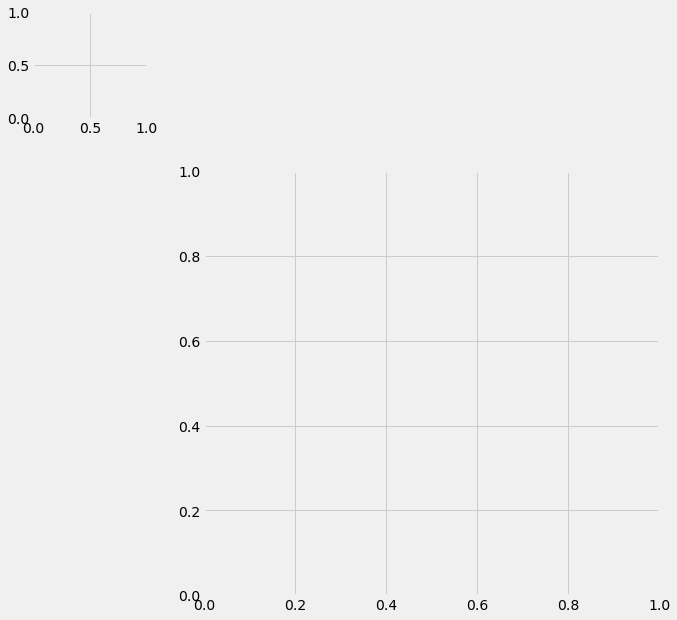

In [35]:
import seaborn as sns
C=cons_matrix(file)


g=sns.clustermap(C)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

#### b. Change in area under CDF (1 point)

#### c. Best cluster from the consensus matrix for each sample (1 point)